<a href="https://colab.research.google.com/github/AK47dev1/Simple-Classification-using-MLP/blob/main/Source.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn import decomposition
from sklearn import preprocessing
from tensorflow.keras import layers
from IPython.display import clear_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

In [37]:
class PlotLearning(keras.callbacks.Callback):
    """
    Callback to plot the learning curves of the model during training.
    """

    def on_train_begin(self, logs={}):
        self.metrics = {}
        for metric in logs:
            self.metrics[metric] = []

    def on_epoch_end(self, epoch, logs={}):
        # Storing metrics
        for metric in logs:
            if metric in self.metrics:
                self.metrics[metric].append(logs.get(metric))
            else:
                self.metrics[metric] = [logs.get(metric)]

        # Plotting
        metrics = [x for x in logs if 'val' not in x]

        f, axs = plt.subplots(1, len(metrics), figsize=(15, 5))
        clear_output(wait=True)

        for i, metric in enumerate(metrics):
            axs[i].plot(range(1, epoch + 2),
                        self.metrics[metric],
                        label=metric)
            if logs['val_' + metric]:
                axs[i].plot(range(1, epoch + 2),
                            self.metrics['val_' + metric],
                            label='val_' + metric)

            axs[i].legend()
            axs[i].grid()

        plt.tight_layout()
        plt.show()

In [38]:
ds = pd.read_csv('./seeds_dataset.txt', sep=',', header=None)
ds = ds.to_numpy()

x = ds[:, 0:7]
y = ds[:, 7] - 1
# sparse_categorical_crossentropy needs this

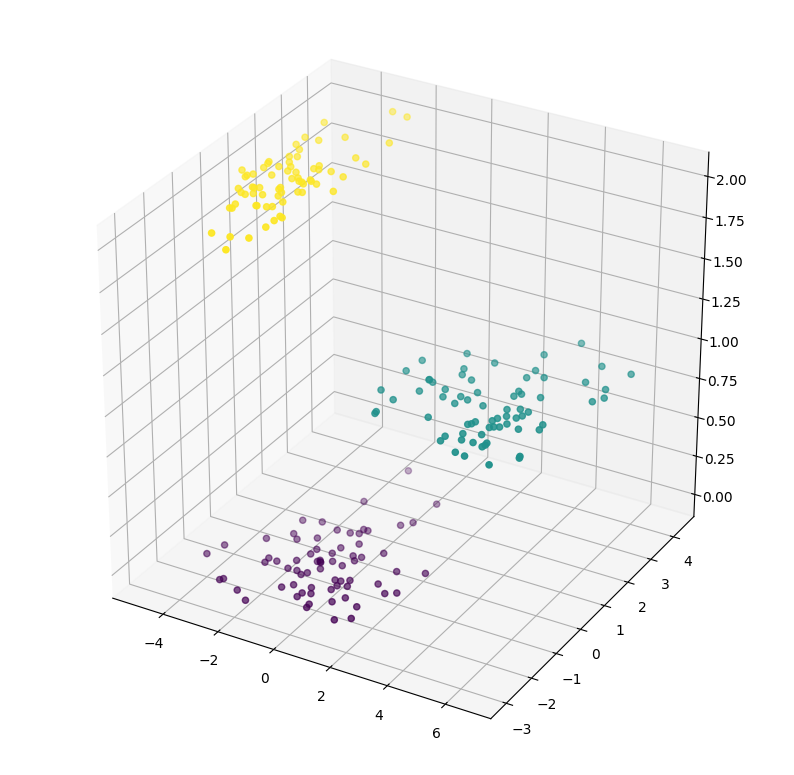

In [39]:
pca = decomposition.PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)

fig = plt.figure(figsize=(10, 10), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter(x_pca[:, 0], x_pca[:, 1], y, c=y)
plt.show()

In [40]:
# trick: just scale x
mm_scaler = preprocessing.MinMaxScaler()
x_norm = mm_scaler.fit_transform(x)

x_train, x_test_val, y_train, y_test_val = train_test_split(x_norm, y, train_size=(7 / 10), shuffle=True)
x_test, x_valid, y_test, y_valid = train_test_split(x_test_val, y_test_val, train_size=(2 / 3), shuffle=True)

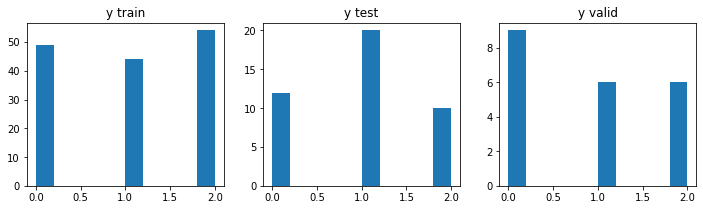

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))
axs[0].hist(y_train)
axs[0].set_title('y train')
axs[1].hist(y_test)
axs[1].set_title('y test')
axs[2].hist(y_valid)
axs[2].set_title('y valid')
_ = plt.show()

In [49]:
def create_model():
  model = keras.Sequential()
  model.add(keras.Input(shape=(7)))
  
  model.add(layers.Dense(15, activation='relu'))
  model.add(layers.Dense(15, activation='relu'))

  model.add(layers.Dense(3, activation='softmax'))

  return model

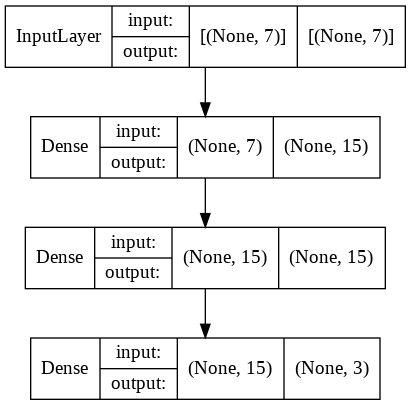

In [50]:
model = create_model()
keras.utils.plot_model(model, show_shapes=True, show_layer_names=False)

In [51]:
model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

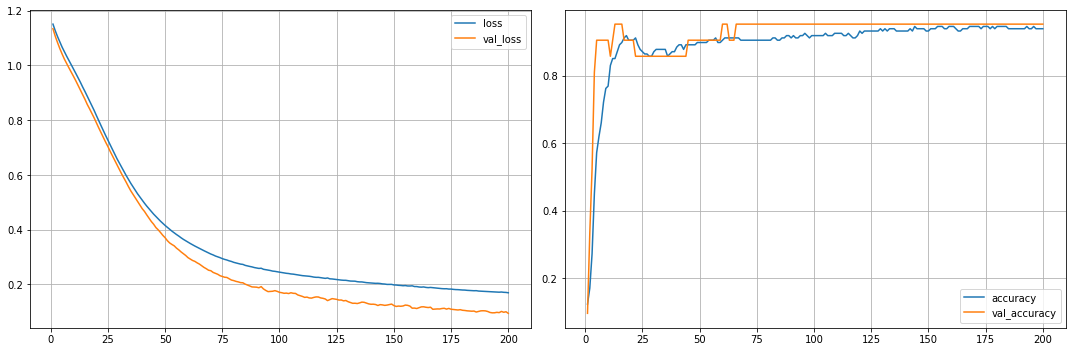

5/5 [==============================] - 0s 94ms/step - loss: 0.1698 - accuracy: 0.9388 - val_loss: 0.0947 - val_accuracy: 0.9524


In [52]:
model.fit(x_train, y_train, validation_data=(x_valid, y_valid), epochs=200, callbacks=[PlotLearning()])

In [53]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=-1)

In [54]:
acc = accuracy_score(y_test, pred)
str_out = 'The accuracy of the perceptron model on the Seeds dataset is ' + str(acc*100) + '%' 
print(str_out)

The accuracy of the perceptron model on the Seeds dataset is 97.61904761904762%


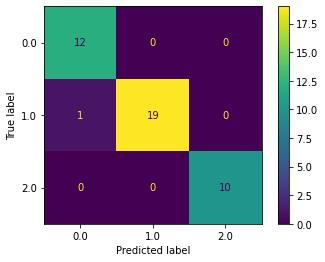

In [55]:
_ = ConfusionMatrixDisplay.from_predictions(y_test, pred)